In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [3]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [4]:
df.shape

(15, 2)

In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
q3 = df.quantile(0.75,axis= 0)
q3

Chirps/Second         17.15
Ground Temperature    83.40
Name: 0.75, dtype: float64

In [7]:
q1 = df.quantile(0.25,axis= 0)
q1

Chirps/Second         15.45
Ground Temperature    73.40
Name: 0.25, dtype: float64

In [8]:
iqr = q3-q1
iqr

Chirps/Second          1.7
Ground Temperature    10.0
dtype: float64

In [9]:
upperthreshold = (1.5*iqr)+q3
upperthreshold

Chirps/Second         19.7
Ground Temperature    98.4
dtype: float64

In [10]:
lowerthreshold = (1.5*iqr)- q1
lowerthreshold

Chirps/Second        -12.9
Ground Temperature   -58.4
dtype: float64

In [11]:
df = df.drop_duplicates()
df.shape

(15, 2)

In [12]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

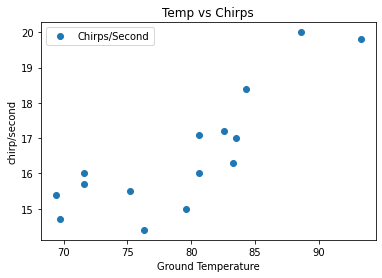

In [13]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
plt.title('Temp vs Chirps')
plt.xlabel('Ground Temperature')
plt.ylabel('chirp/second')
plt.show()

In [14]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [15]:
X = df.loc[:,"Ground Temperature"].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Chirps/Second'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
y_test

array([14.4, 17.2, 17. ])

In [17]:
X_train.size

12

In [18]:
X_test

array([76.3, 82.6, 83.5])

In [19]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X= X.reshape(-1,1)

In [20]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
C = regressor.intercept_

In [22]:
M = regressor.coef_

In [23]:
regressor.predict([[88.6]])

array([18.57795082])

In [24]:
y_pred = regressor.predict(X) 
y_pred

array([18.57795082, 15.18451956, 19.51613475, 17.71961232, 16.98104199,
       15.90312853, 14.80525372, 15.18451956, 14.74536964, 17.51999872,
       16.78142839, 17.3802692 , 16.98104199, 17.55992144, 16.1227035 ])

In [25]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))



R2- SCORE: 0.6822564737106268


In [26]:
regressor.predict([[95]])

array([19.85547788])

In [27]:
yd = M*X+C

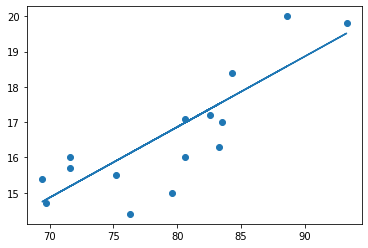

In [28]:
plt.scatter(X,y)
plt.plot(X,regressor.predict(X))

In [29]:
x = 18/M-C
x


array([89.28202956])